# Plots Imtek Poster Tag 2019

## Header

### Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import scipy.interpolate
import scipy.constants as C
import ase.data

import os

In [69]:
# for storing files in database
from fireworks.utilities.filepad import FilePad, LAUNCHPAD_LOC

### Global settings

In [70]:
%matplotlib inline

In [4]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (11,7) # the standard figure size

### Supportive functions & snippets

In [71]:
def df_crossjoin(df1, df2, **kwargs):
    """Creates row-wise cartesian product of two data frames"""
    df1['_tmpkey'] = 1
    df2['_tmpkey'] = 1

    res = pd.merge(df1, df2, on='_tmpkey', **kwargs).drop('_tmpkey', axis=1)
    #res.index = pd.MultiIndex.from_product((df1.index, df2.index))

    df1.drop('_tmpkey', axis=1, inplace=True)
    df2.drop('_tmpkey', axis=1, inplace=True)

    return res

In [72]:
def subplotPosition(rows,cols):
    """generator for subplot positions"""
    for p in range(0,rows*cols):
        yield rows*100+cols*10+p+1

def addSubplot(x, y,
               title=None, xlabel=None, ylabel=None, legend=None, fmtstr=None,
               fig=None, ax=None, pos=None, figsize=(8,5)):
    """facilitate matplotlib figure & subplot creation. only one data series per call."""
    
    if not pos:
        pos = 111
    if not fig and not ax:
        fig = plt.figure(figsize=figsize)
    elif not fig and ax:
        fig = ax.get_figure()
    if not ax:
        ax = fig.add_subplot(pos)
      
    if fmtstr and legend:
        ax.plot(x,y,fmtstr,label=legend)
    elif fmtstr:
        ax.plot(x,y,fmtstr)         
    elif legend:
        ax.plot(x,y,label=legend)
    else:
        ax.plot(x,y)
               
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
        
    if legend:
        ax.legend()
        
    return fig, ax

In [73]:
# constants

In [74]:
AU = C.value("atomic mass constant")

In [75]:
AU

1.66053904e-27

In [76]:
C.atomic_mass # kg

1.66053904e-27

In [77]:
# Using ase atomic data

In [78]:
ad = pd.DataFrame(data={"symbol": ase.data.chemical_symbols,
                                "name"  : ase.data.atomic_names,
                                "mass"  : ase.data.atomic_masses } ) # atomic data

In [79]:
str_DSm = {'C': 12, 'H': 25, 'S': 1, 'O': 4}
str_CTAp = {'C': 19, 'H': 42, 'N': 1}

In [80]:
M_Br = ad[ ad.symbol == "Br" ]['mass'].values[0] * C.gram # a bit too much

In [81]:
M_Na = ad[ ad.symbol == "Na" ]['mass'].values[0] * C.gram

In [82]:
M_DSm = 0
for sym, n in str_DSm.items():
    M_DSm += ad[ ad.symbol == sym ]['mass'].values[0] * n * C.gram

In [83]:
M_CTAp = 0
for sym, n in str_CTAp.items():
    M_CTAp += ad[ ad.symbol == sym ]['mass'].values[0] * n * C.gram

In [84]:
M_SDS_sum = M_DSm + M_Na
M_CTAB_sum = M_CTAp + M_Br

In [85]:
M_SDS  = 288.372 * C.gram # kg / mol, Na+ inclusively, 
M_CTAB = 364.45  * C.gram  # kg / mol, Br- inclusively, https://en.wikipedia.org/wiki/Cetrimonium_bromide

In [86]:
M_CTAp

0.28455199999999997

In [87]:
M_CTAB

0.36445

In [88]:
M_SDS_sum - M_SDS

5.769280000011978e-06

In [89]:
M_CTAB_sum - M_CTAB

6.0000000000060005e-06

In [90]:
def cMolar(massFraction, molarMassSolute, solventDensity=0.997):
    # default density: water at 298 K and 1013 hPa, [density] = kg dm^-3 = kg L^-3
    # cMolar_i = massFraction_i * rho / M_i
    # where M is the solute's i molar mass, 
    # and rho the solution's density ( ~ solvent's density at low concentrations)
    return massFraction*solventDensity / molarMassSolute # mol L^-3 = M

In [91]:
def cal2J(e):
    return e/C.calorie

In [92]:
def J2cal(e):
    return e/C.calorie

In [93]:
def sigma2R(sigma): # LJ parameter conversion:
    return 2.0**(1.0/6.0)*sigma

In [94]:
sigma2R(4.83)/2

2.7107458466671357

In [95]:
C.calorie

4.184

In [96]:
J2cal(0.21)

0.05019120458891013

## Poster Plot

In [31]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
mpl.rcParams['font.serif'] = ['Arial']
mpl.rcParams['font.cursive'] = ['Arial']
mpl.rcParams['font.size'] = '10'
mpl.rcParams['legend.fontsize'] = '10'
mpl.rcParams['xtick.labelsize'] = '8'
mpl.rcParams['ytick.labelsize'] = '8'
mpl.rcParams['svg.fonttype'] = 'none'

In [97]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (16,10) # the standard figure size

plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 14
plt.rcParams["lines.markeredgewidth"]=1 

In [98]:
import json
from glob import glob
import re
from pprint import pprint

In [99]:
prefix = os.getcwd()

In [100]:
data_prefix = prefix + os.sep + 'data' + os.sep + 'references'

In [101]:
filename_regex = re.compile('zhang2014stick_slip_fig([0-9])_(.*)[.]csv')

In [102]:
title_dict = {
    2: r'Adsorption isotherm of SDS on 316L stainless steel',
    4: r'COF of $\mathrm{ZrO}_2$ / stainless steel friction couple at $3 \mathrm{N}$ load and $2 \mathrm{mm} \mathrm{s}^{-1}$ sliding velocity',
    7: r'Kinetic ($\mu_k$) and static ($\mu_s$) COF during stick-slip at different SDS concentraions',
    8: r'Critical velocity for continuous sliding'
}

In [103]:
x_label_dict = {
    2: r'SDS bulk concentration $c$ $\left(\mathrm{mM}\right)$',
    4: r'SDS bulk concentration $c$ $\left(\mathrm{mM}\right)$',
    7: r'Sliding velocity $v$ $\left(\mathrm{mm}\ \mathrm{s}^{-1}\right)$',
    8: r'SDS bulk concentration $c$ $\left(\mathrm{mM}\right)$'
}

In [104]:
y_label_dict = {
    2: r'Adsorption mass $m$ $\left(\mathrm{ng}\ \mathrm{cm}^{-2}\right)$',
    4: r'Coefficient of friction $\mu$',
    7: r'Coefficient of friction $\mu$',
    8: r'Critical velocity $v$ $\left(\mathrm{mm}\ \mathrm{s}^{-1}\right)$'
}

In [105]:
ref_dict = {}
#ref_prefix = 'zhang2014stick_slip_'
for f in glob(data_prefix + os.sep + 'zhang2014stick_slip_*.csv'):
    filename = os.path.basename(f)
    matched = filename_regex.match(filename)
    
    fig_num = int( matched.group(1) )
    if fig_num not in ref_dict:
        ref_dict[fig_num] = {}
    
    data_set_name = matched.group(2)
    ref_dict[fig_num][data_set_name] = pd.read_csv(f, header=None, skiprows=0)

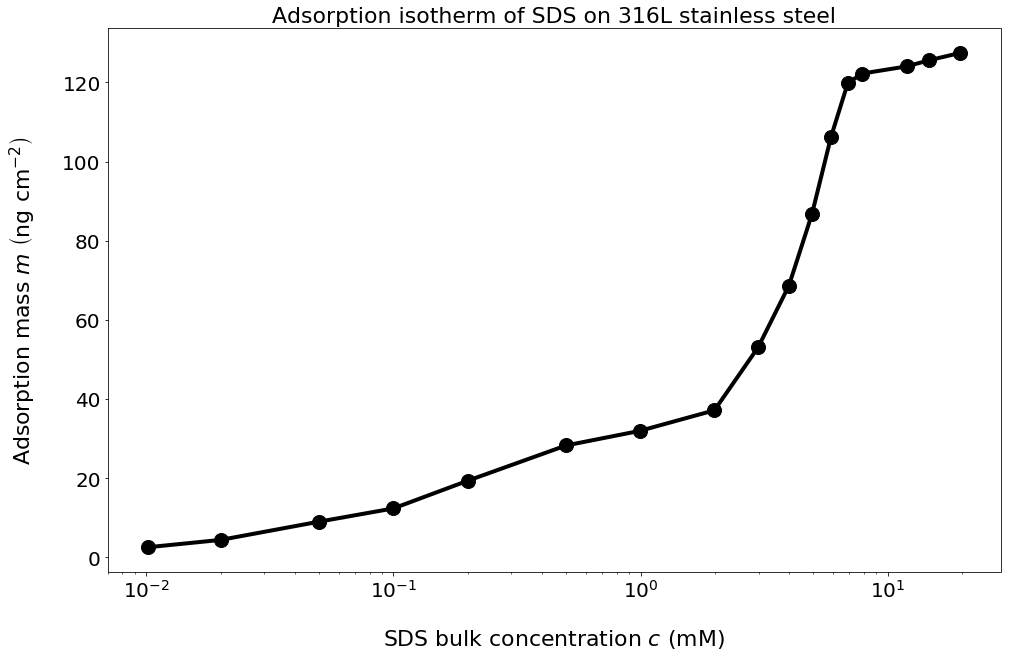

In [106]:
fig_num = 2
pos = subplotPosition(1,1)
p = next(pos)
for data_set_name, data_set in ref_dict[fig_num].items():
    #plt.semilogx(data_set[0], data_set[1], )
    plt.semilogx(data_set[0], data_set[1], 'ko-' )
    plt.title(title_dict[fig_num])
    plt.xlabel(x_label_dict[fig_num], labelpad=BIGGER_SIZE)
    plt.ylabel(y_label_dict[fig_num], labelpad=BIGGER_SIZE)
        

In [42]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrecursor-bold.otf',
 '/usr/share/texmf/fonts/opentype/public/tex-gyre-math/texgyrebonum-math.otf',
 '/usr/share/fonts/truetype/lato/Lato-Hairline.ttf',
 '/usr/share/fonts/opentype/stix-word/STIXMath-Regular.otf',
 '/usr/share/fonts/truetype/lato/Lato-BlackItalic.ttf',
 '/usr/share/texmf/fonts/opentype/public/tex-gyre-math/texgyreschola-math.otf',
 '/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyreheros-bolditalic.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmono10-italic.otf',
 '/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyreschola-bolditalic.otf',
 '/usr/share/fonts/opentype/mathjax/MathJax_SansSerif-Bold.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmromancaps10-oblique.otf',
 '/usr/share/fonts/truetype/lyx/eufm10.ttf',
 '/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyreheroscn-bolditalic.otf',
 '/usr/share/fonts/truetype/lyx/cmsy10.ttf',
 '/usr/share/fonts/opentype/stix/STIXIntegralsSm-Bold.otf',


In [43]:
plt.rcParams["figure.figsize"] = (12,10) # the standard figure size

Text(0.5, 0, 'SDS bulk concentration $c$ $\\left(\\mathrm{mM}\\right)$')

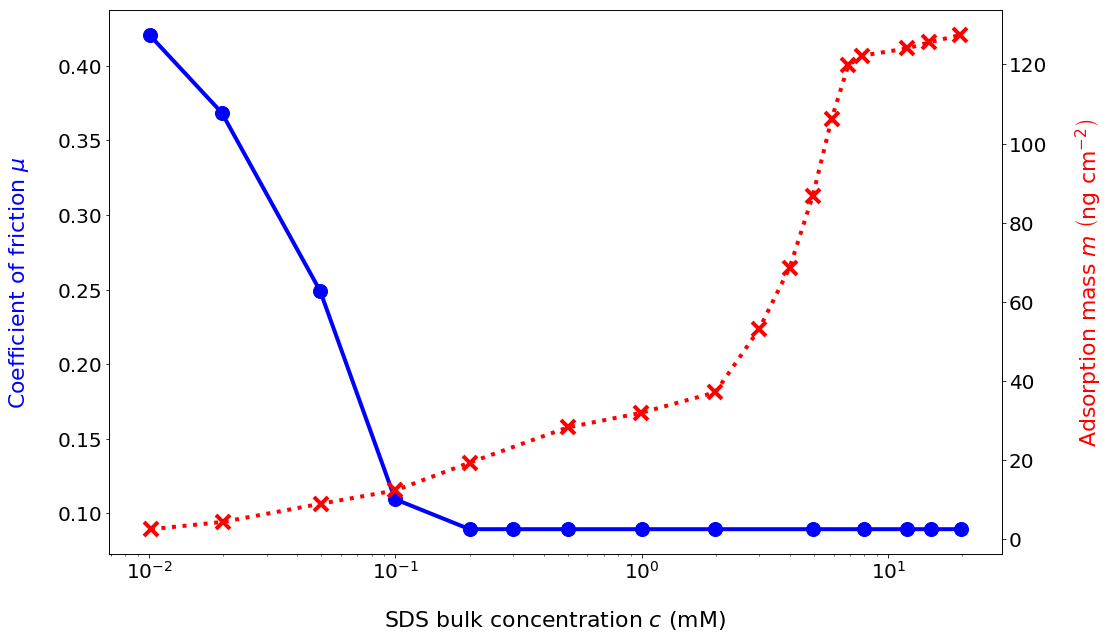

In [107]:
fig, ax_COF = plt.subplots()
ax_mass = ax_COF.twinx()

fig_num = 2
for data_set_name, data_set in ref_dict[fig_num].items():
    ax_mass.semilogx(data_set[0], data_set[1], 'r:', 
                     marker='x', markeredgewidth=4, label=r'adsorption mass $m$' )
    #ax_mass.semilogx(data_set[0], data_set[1], linestyle='None', 
    #                 marker='x', markeredgewidth=4, color='b', linewidth=20)
    #ax_mass.set_title(title_dict[fig_num])
    ax_mass.set_ylabel(y_label_dict[fig_num], labelpad=BIGGER_SIZE, color='r')
    #ax_mass.set_label(r'adsorption mass $m$')
    
fig_num = 4
for data_set_name, data_set in ref_dict[fig_num].items():
    ax_COF.semilogx(data_set[0], data_set[1], 'bo-', label='COF $\mu$' )
    #ax_COF.semilogx(data_set[0], data_set[1], 'ro' )
    #ax_COF.set_xlabel(x_label_dict[fig_num])
    ax_COF.set_ylabel(y_label_dict[fig_num], labelpad=BIGGER_SIZE, color='b')
    #ax_COF.set_label(r'COF $\mu$')
    
ax_COF.set_xlabel(x_label_dict[fig_num], labelpad=BIGGER_SIZE)
#ax_COF.legend(frameon=False, loc='center left')
#ax_mass.legend(frameon=False, loc='center')

#fig.tight_layout()


In [111]:
fig_num = 7
COF_keys = list(ref_dict[fig_num].keys())

In [112]:
concentrations = [ 0.01, 0.1, 10, 1]

In [113]:
COF_kinetic_keys = sorted(COF_keys)[:4]

In [114]:
COF_kinetic_keys_dict = dict(zip(concentrations,COF_kinetic_keys))

In [115]:
COF_kinetic_keys_dict

{0.01: 'mu_k_0.01mM_SDS',
 0.1: 'mu_k_0.1mM_SDS',
 1: 'mu_k_1mM_SDS',
 10: 'mu_k_10mM_SDS'}

In [116]:
COF_static_keys = sorted(COF_keys)[4:]

In [117]:
COF_static_keys_dict = dict(zip(concentrations,COF_static_keys))

In [118]:
full_x_lim = ax_COF.get_xlim()
full_y_lim = ax_COF.get_ylim()

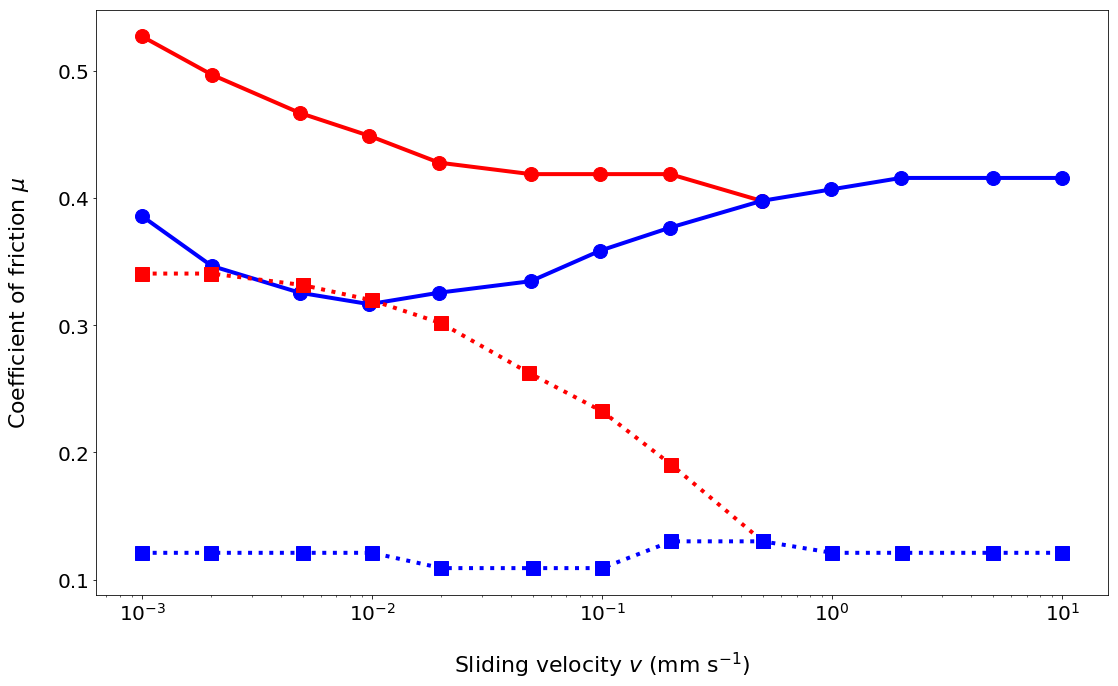

In [119]:
static_label = "$\mu_s$ at {0: 5.2f} $\mathrm{{ mM }}$"
kinetic_label = "$\mu_k$ at {0: 5.2f} $\mathrm{{ mM }}$"

red_styles =['ro-','rX-.','rP--','rs:']
blue_styles=['bo-','bX-.','bP--','bs:']
num_plots = 4
styles = []
for i in range(len(red_styles)):
    styles.extend([red_styles[i],blue_styles[i]])


fig, ax_COF = plt.subplots()
#ax_mass = ax_COF.twinx()
    
fig_num = 7
i = 0
#for data_set_name, data_set in ref_dict[fig_num].items():
for c in sorted(concentrations):
    if i == 1 or i == 2: 
        i +=1 
        continue
        
    static_id = COF_static_keys_dict[c]
    kinetic_id = COF_kinetic_keys_dict[c]
    ax_COF.semilogx(
        ref_dict[fig_num][static_id][0], ref_dict[fig_num][static_id][1], 
        red_styles[i%num_plots], label = static_label.format(c) )
    ax_COF.semilogx(
        ref_dict[fig_num][kinetic_id][0], ref_dict[fig_num][kinetic_id][1], 
        blue_styles[i%num_plots], label = kinetic_label.format(c))
    
    #if i > 2: break
    i += 1

    #ax_COF.semilogx(data_set[0], data_set[1], 'ro' )
    #ax_COF.set_xlabel(x_label_dict[fig_num])
ax_COF.set_ylabel(y_label_dict[fig_num], labelpad=BIGGER_SIZE)
ax_COF.set_xlabel(x_label_dict[fig_num], labelpad=BIGGER_SIZE)
ax_COF.set_xlim( full_x_lim )
ax_COF.set_ylim( full_y_lim )
#ax_COF.legend()
#ax_COF.set_label(r'COF $\mu$')    
fig.tight_layout()


In [120]:
fig_num = 8


In [121]:
ref_dict[fig_num].keys()

dict_keys(['Load_3N', 'Load_1N'])

In [122]:
load_label = ['$3 \mathrm{N}$ load', '$1 \mathrm{N}$ load']

In [123]:
label_dict = dict(zip( ref_dict[fig_num].keys(), load_label))

In [124]:
label_dict

{'Load_1N': '$1 \\mathrm{N}$ load', 'Load_3N': '$3 \\mathrm{N}$ load'}

In [125]:
styles =['ro-','bo-']

In [130]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (8,6) # the standard figure size

plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 14
plt.rcParams["lines.markeredgewidth"]=1 

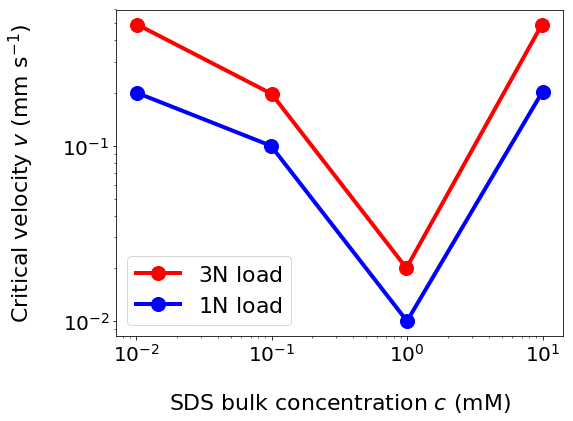

In [131]:
pos = subplotPosition(1,1)
i = 0
num_plots = 2
p = next(pos)
for data_set_name, data_set in ref_dict[fig_num].items():
    plt.loglog(data_set[0], data_set[1], styles[i%num_plots], 
               label = label_dict[data_set_name] )
    i +=1
    #plt.loglog(data_set[0], data_set[1], 'o-' )
    
    #plt.title(title_dict[fig_num])
plt.xlabel(x_label_dict[fig_num], labelpad=BIGGER_SIZE)
plt.ylabel(y_label_dict[fig_num], labelpad=BIGGER_SIZE)
plt.legend()

In [65]:
rows = 1
cols = 1

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot(ref_dict[2],
                   exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2,
                   title = "Surface number density of surfactant ions on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'molecules per area $\frac{n}{\mathrm{nm}^{-2}}$',
                   legend = "SDS, unpublished 2017", fig = fig, pos = p)
_, _ = addSubplot( 
    exp_sklt_unpublished_fig1_bulk_concentration_from_molecular_area_for_poster_plot(
        sim_SDS_on_AU_111_molecular_surface_areas_of_interest ) [1:] / C.milli,     
    1.0 / sim_SDS_on_AU_111_molecular_surface_areas_of_interest[1:] * C.nano**2,
            fmtstr='ro', fig = fig, pos = p, ax = ax )

_, _ = addSubplot( 
    exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
    exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
    legend = "CTAB, Kawasaki 2007", fig = fig, pos = p, ax = ax )

_, _ = addSubplot( 
    sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli,
    1.0 / sim_CTAB_on_AU_111_area_per_monolayer_molecule * C.nano**2,
    fmtstr='ro', fig = fig, pos = p, ax = ax,
    legend = "Discrete subsets in focus")

ax.legend(frameon=False)
ax.set_xscale("log")
fig.tight_layout()

NameError: name 'exp_sklt_unpublished_fig1_data' is not defined

<Figure size 576x360 with 0 Axes>

In [910]:
minor_x_ticks = np.log10( ax.get_xticks(minor=True) )

In [911]:
minor_x_ticks

array([-3.69897   , -3.52287875, -3.39794001, -3.30103   , -3.22184875,
       -3.15490196, -3.09691001, -3.04575749, -2.69897   , -2.52287875,
       -2.39794001, -2.30103   , -2.22184875, -2.15490196, -2.09691001,
       -2.04575749, -1.69897   , -1.52287875, -1.39794001, -1.30103   ,
       -1.22184875, -1.15490196, -1.09691001, -1.04575749, -0.69897   ,
       -0.52287875, -0.39794001, -0.30103   , -0.22184875, -0.15490196,
       -0.09691001, -0.04575749,  0.30103   ,  0.47712125,  0.60205999,
        0.69897   ,  0.77815125,  0.84509804,  0.90308999,  0.95424251,
        1.30103   ,  1.47712125,  1.60205999,  1.69897   ,  1.77815125,
        1.84509804,  1.90308999,  1.95424251,  2.30103   ,  2.47712125,
        2.60205999,  2.69897   ,  2.77815125,  2.84509804,  2.90308999,
        2.95424251,  3.30103   ,  3.47712125,  3.60205999,  3.69897   ,
        3.77815125,  3.84509804,  3.90308999,  3.95424251])

In [912]:
major_x_ticks = np.log10( ax.get_xticks() )

In [913]:
major_x_ticks

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.])

In [902]:
exp_sklt_unpublished_fig1_bulk_log_concentration_from_molecular_area = \
    scipy.interpolate.interp1d(
        exp_sklt_unpublished_fig1_data["A"],
        np.log10( exp_sklt_unpublished_fig1_data["c"] / C.milli), 
        axis=0, kind='slinear', bounds_error=False,
        fill_value="extrapolate")

In [931]:
wanted_minor_x_ticks = minor_x_ticks[ (minor_x_ticks > -3.0) & (minor_x_ticks < 2.0) ]

In [932]:
wanted_major_x_ticks = major_x_ticks[ (major_x_ticks >= -2.0) & (major_x_ticks <= 1.9) ]

In [963]:
x_ticks_labels = [ '$10^{{{:.0f}}}$'.format(xval) for xval in wanted_major_x_ticks ]

In [964]:
x_ticks_labels

['$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$']

In [950]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
mpl.rcParams['font.serif'] = ['Arial']
mpl.rcParams['font.cursive'] = ['Arial']
mpl.rcParams['font.size'] = '10'
mpl.rcParams['legend.fontsize'] = '10'
mpl.rcParams['xtick.labelsize'] = '8'
mpl.rcParams['ytick.labelsize'] = '8'
mpl.rcParams['svg.fonttype'] = 'none'

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


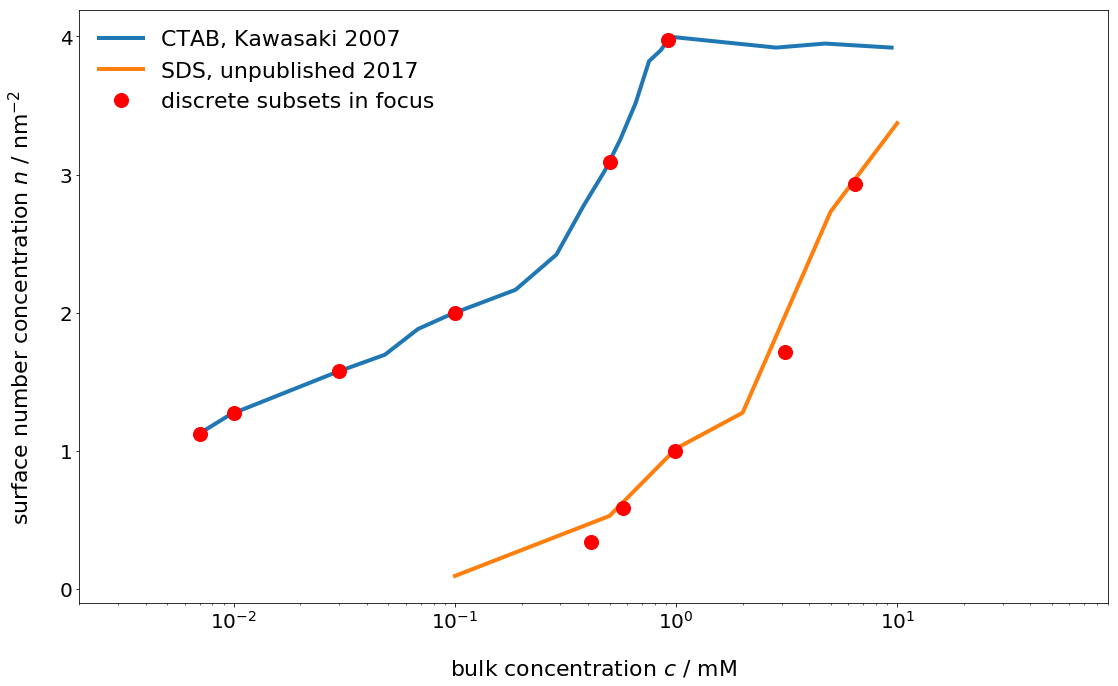

In [988]:
rows = 1
cols = 1

fig = plt.figure(figsize=(16*cols, 10*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot( np.log10( exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli ),
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
                   legend = "CTAB, Kawasaki 2007", fig = fig, pos = p)
_, _ = addSubplot( np.log10( sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli ),
                    1.0 / sim_CTAB_on_AU_111_area_per_monolayer_molecule * C.nano**2,
                    fmtstr='ro', fig = fig, pos = p, ax = ax )
_, _ = addSubplot(
    np.log10( exp_sklt_unpublished_fig1_data[["c"]] / C.milli ),
            b,
            #title = "Surface number density of surfactant ions on Au (111), experimental", 
            legend = "SDS, unpublished 2017", fig = fig, pos = p, ax = ax ) 
_, _ = addSubplot( 
    exp_sklt_unpublished_fig1_bulk_log_concentration_from_molecular_area(
        sim_SDS_on_AU_111_molecular_surface_areas_of_interest )[2:],     
    1.0 / sim_SDS_on_AU_111_molecular_surface_areas_of_interest[2:] * C.nano**2,
            fmtstr='ro', fig = fig, pos = p, ax = ax,
            legend = "discrete subsets in focus")


ax.legend(frameon=False, loc='upper left')
ax.set_yticks(np.arange(0,5,dtype=int))
ax.set_xticks(wanted_minor_x_ticks, minor=True)
ax.set_xticks(wanted_major_x_ticks, minor=False)
ax.set_xticklabels(x_ticks_labels)
# ax.set_xscale("log")
ax.set_xlabel(r'bulk concentration $ c \ / \ \mathrm{mM}$', labelpad=BIGGER_SIZE)
ax.set_ylabel(r'surface number concentration $ n \ / \ {\mathrm{nm}^{-2}}$',labelpad=BIGGER_SIZE)
fig.tight_layout()


In [71]:
exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2

NameError: name 'exp_sklt_unpublished_fig1_data' is not defined

In [989]:
os.getcwd()

'/work/ws/nemo/fr_jh1130-201708-0/jobs/doc/md/surfactants'

In [990]:
os.mkdir('fig')

In [991]:
fig.savefig('fig/20180927_concentrations_in_focus.png')

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [1008]:
wanted_minor_x_ticks = minor_x_ticks[ (minor_x_ticks > -3.0) & (minor_x_ticks <= 1.0) ]

In [1009]:
wanted_major_x_ticks = major_x_ticks[ (major_x_ticks >= -2.0) & (major_x_ticks <= 1.9) ]

In [1010]:
x_ticks_labels = [ '$10^{{{:.0f}}}$'.format(xval) for xval in wanted_major_x_ticks ]

In [1011]:
x_ticks_labels

['$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$']

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


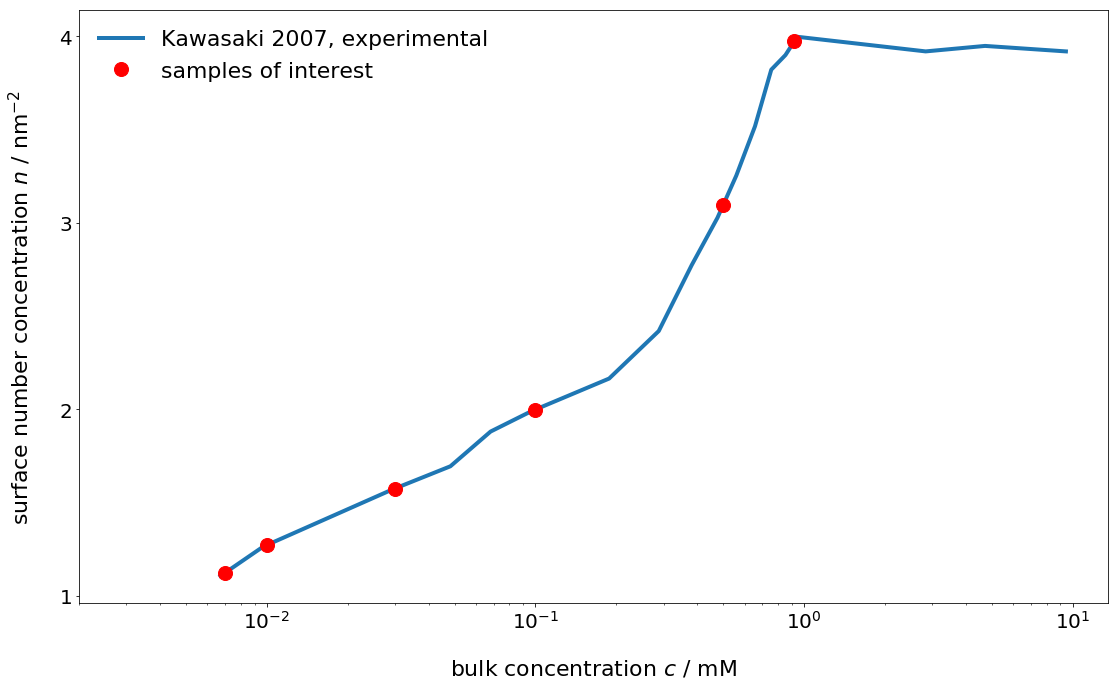

In [1013]:
rows = 1
cols = 1

fig = plt.figure(figsize=(16*cols, 10*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
_, ax = addSubplot( np.log10( exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli ),
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
                   legend = "Kawasaki 2007, experimental", fig = fig, pos = p)
_, _ = addSubplot( np.log10( sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli ),
                    1.0 / sim_CTAB_on_AU_111_area_per_monolayer_molecule * C.nano**2,
                    fmtstr='ro', fig = fig, pos = p, ax = ax,
                    legend = "samples of interest")
# _, _ = addSubplot(
#     np.log10( exp_sklt_unpublished_fig1_data[["c"]] / C.milli ),
#             exp_sklt_unpublished_fig1_data[["GammaN"]] * C.nano**2,
#             #title = "Surface number density of surfactant ions on Au (111), experimental", 
#             legend = "SDS, unpublished 2017", fig = fig, pos = p, ax = ax ) 
# _, _ = addSubplot( 
#     exp_sklt_unpublished_fig1_bulk_log_concentration_from_molecular_area(
#         sim_SDS_on_AU_111_molecular_surface_areas_of_interest )[2:],     
#     1.0 / sim_SDS_on_AU_111_molecular_surface_areas_of_interest[2:] * C.nano**2,
#             fmtstr='ro', fig = fig, pos = p, ax = ax,
#             legend = "discrete subsets in focus")


ax.legend(frameon=False, loc='upper left')
ax.set_yticks(np.arange(1,5,dtype=int))
ax.set_xticks(wanted_minor_x_ticks, minor=True)
ax.set_xticks(wanted_major_x_ticks, minor=False)
ax.set_xticklabels(x_ticks_labels)
# ax.set_xscale("log")
ax.set_xlabel(r'bulk concentration $ c \ / \ \mathrm{mM}$', labelpad=BIGGER_SIZE)
ax.set_ylabel(r'surface number concentration $ n \ / \ {\mathrm{nm}^{-2}}$',labelpad=BIGGER_SIZE)
fig.tight_layout()


In [1016]:
fig.savefig('fig/20180927_concentrations_in_focus_ctab_only_600dpi.png', dpi=600)

/opt/bwhpc/common/devel/python/3.6.3.20171114/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


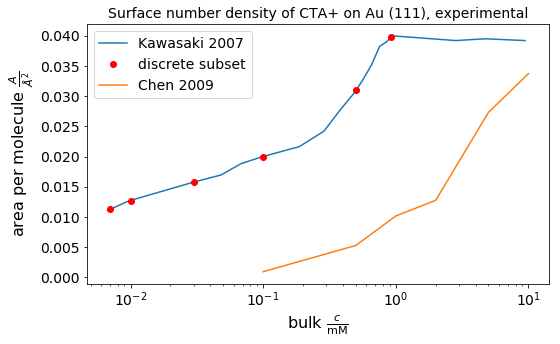

In [822]:
rows = 1
cols = 1

fig = plt.figure(figsize=(8*cols, 5*rows))

pos = subplotPosition(cols=cols,rows=rows)

p = next(pos)
fig, ax = addSubplot(
                   exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.angstrom**2,
                   title = "Surface number density of CTA+ on Au (111), experimental", 
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'molecules per area $\frac{n}{\mathrm{nm}^{-2}}$',
                   legend = "Kawasaki 2007", fig = fig, pos = p)
# _, _ = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
#                   exp_kawasaki2007influence_fig1b_data[["GammaN"]] * C.nano**2,
#                   fmtstr='ro', fig = fig, pos = p, ax = ax)


_, _ = addSubplot( exp_sklt_unpublished_fig1_data[["c"]] / C.milli,
                   1/exp_sklt_unpublished_fig1_data[["A"]] * C.angstrom**2,
                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
                   legend = "Chen 2009", fig = fig, ax = ax )

ax.plot(
    sim_CTAB_on_AU_111_bulk_concentrations_of_interest / C.milli,
    1.0 / sim_CTAB_on_AU_111_area_per_monolayer_molecule * C.angstrom**2,'ro',
    label = 'discrete subset'
    )

ax.legend()
ax.set_xscale("log")

# p = next(pos)
# _, ax = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
#                   exp_kawasaki2007influence_fig1b_data[["A"]] / C.angstrom**2,
#                   title = "Area perc CTA+ molecule on Au (111), experimental", 
#                   xlabel = r'bulk $\frac{c}{\mathrm{mM}}$', 
#                   ylabel = r'area per molecule $\frac{A}{\AA^2}$',
#                   legend = "Kawasaki 2007", fig = fig, pos = p)
# _, _ = addSubplot(exp_kawasaki2007influence_fig1b_data[["c"]] / C.milli,
#                   exp_kawasaki2007influence_fig1b_data[["A"]] /C.angstrom**2,
#                    fmtstr='ro', fig = fig, pos = p, ax = ax)
# ax.set_xscale("log")

fig.tight_layout()

## Simulation performance data